In [1]:
from gimeltune import create_job, Experiment, SearchSpace, Real
from math import sin

In [40]:
space = SearchSpace()
space.insert(Real('x', low=-1.0, high=1.0))
space.insert(Real('y', low=-1.0, high=1.0))

In [41]:
def bill(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def aecli(x, y):
    return float(-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20)
    

def objective(experiment: Experiment):
    x = experiment.params.get('x')
    y = experiment.params.get('y')

    return aecli(x, y)

In [42]:
job = create_job(search_space=space, storage='sqlite:///aecli.db')

In [43]:
job.do(objective, n_trials=500, algo_list=['grid'])

/Users/qnbhd/Development/gimeltune/gimeltune/search/algorithms/grid.py:70: UserWarning: Per emit count not implemented.
  warnings.warn('Per emit count not implemented.')
/Users/qnbhd/Development/gimeltune/gimeltune/jobs/job.py:201: UserWarning: No new configurations.
  warnings.warn('No new configurations.')


In [44]:
job.best_parameters

{'x': -0.0, 'y': -0.0}

Text(0, 0.5, 'y')

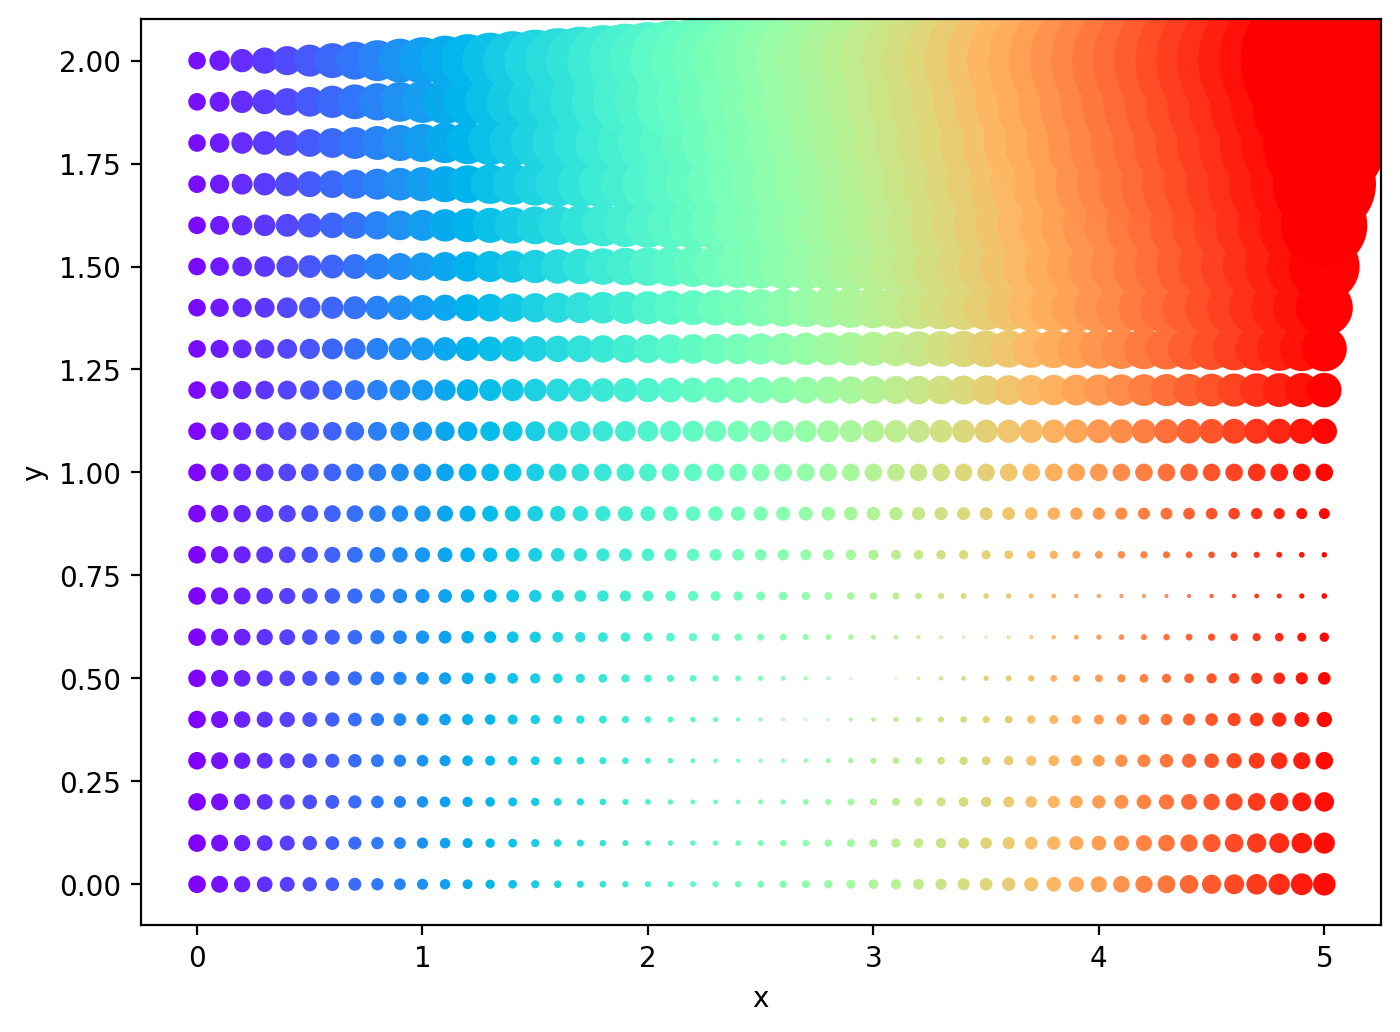

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import numpy as np

figure(figsize=(8, 6), dpi=200)

df = job.dataframe

df['objective_result'] = df['objective_result'].multiply(2)
colors = cm.rainbow(np.linspace(0, 1, len(df['x'])))

plt.scatter(df['x'], df['y'], df['objective_result'], color=colors)
plt.xlabel('x')
plt.ylabel('y')

In [45]:
df = job.dataframe

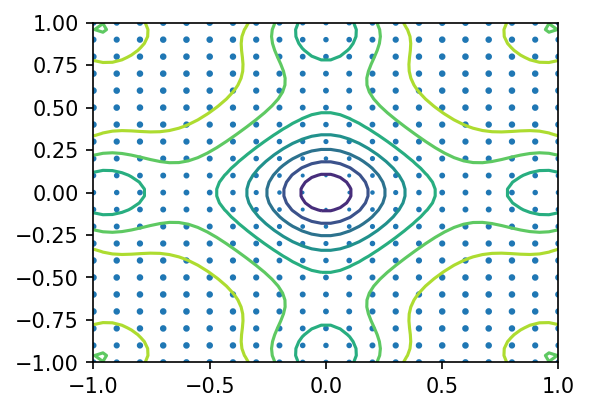

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import numpy as np

figure(figsize=(4, 3), dpi=150)

def aecli(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
    
x = np.linspace(-1.0, 1.0, 50)
y = np.linspace(-1.0, 1.0, 50)

X, Y = np.meshgrid(x, y)
Z = aecli(X, Y)


plt.contour(X, Y, Z)
plt.scatter(df['x'], df['y'], df['objective_result'], marker='o')

In [35]:
df

,id,job_id,state,hash,objective_result,requestor,metrics,create_time,finish_time,x,y
0,1,1,ExperimentState.OK,c1941e2ec077e8cae9f531b5bf196a15210801163f2001...,6.593599,GridSearch,None,2022-04-22 14:11:35.546792,2022-04-22 14:11:35.622305,-2.0,-2.0
1,2,1,ExperimentState.OK,d7281155ef5673fddd84f30a5ef34bf042eb7de602a5b6...,6.708163,GridSearch,None,2022-04-22 14:11:35.627102,2022-04-22 14:11:35.650758,-2.0,-1.9
2,3,1,ExperimentState.OK,b87330d3e3aba94ec3ed5813f0defe99a014e7730239d2...,7.124049,GridSearch,None,2022-04-22 14:11:35.653321,2022-04-22 14:11:35.669594,-2.0,-1.8
3,4,1,ExperimentState.OK,5908af2d125d5f26ffc43477cb2125fa5bc588be45d43f...,7.507675,GridSearch,None,2022-04-22 14:11:35.671670,2022-04-22 14:11:35.687525,-2.0,-1.7
4,5,1,ExperimentState.OK,95332f9359aeb4ff37d629622be502e463fed390635aac...,7.695434,GridSearch,None,2022-04-22 14:11:35.689677,2022-04-22 14:11:35.705647,-2.0,-1.6
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,1,ExperimentState.OK,cf7d94b8689d59117bff661cb52f5f22544dd856c07745...,5.775334,GridSearch,None,2022-04-22 14:12:23.627952,2022-04-22 14:12:23.663725,1.6,-0.1
1496,1497,1,ExperimentState.OK,2eed3a61caf4afd4e6c741ec8eb1ccd5bf1072df7cf2e6...,5.668094,GridSearch,None,2022-04-22 14:12:23.666488,2022-04-22 14:12:23.702839,1.6,0.0
1497,1498,1,ExperimentState.OK,e330f5984a754b449e2aa51a828e3e0ecf08f2c4c07745...,5.775334,GridSearch,None,2022-04-22 14:12:23.705649,2022-04-22 14:12:23.811272,1.6,0.1
1498,1499,1,ExperimentState.OK,b79e6e6a0e680914d1fdc0837365922d0feb13f9532652...,6.017554,GridSearch,None,2022-04-22 14:12:23.814956,2022-04-22 14:12:23.850399,1.6,0.2
